In [1]:
import librosa
import librosa.display
from matplotlib import pyplot as plt
import numpy as np
import glob
import noisereduce as nr

/home/jhm9507/anaconda3/envs/jhm/lib/python3.6/site-packages/tqdm/autonotebook.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [2]:
data = glob.glob("data/train/*.wav")

In [16]:
y,sr = librosa.load(data[1])

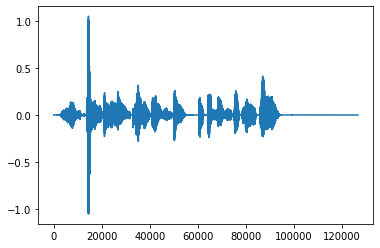

In [17]:
plt.plot(y)

In [42]:
reduced = nr.reduce_noise(y, noise_clip=y, n_fft=512,hop_length=int(0.01*SAMPLE_RATE),win_length=int(0.030*SAMPLE_RATE))

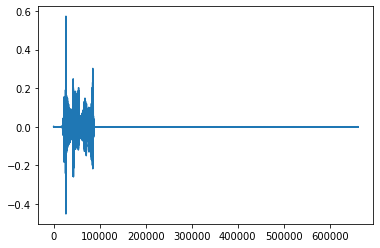

In [43]:
plt.plot(reduced)

In [5]:
frame_length = 0.025
frame_stride = 0.010

In [6]:
def Mel_S(wav):
    y, sr = librosa.load(wav)
    input_nfft = int(round(sr*frame_length))
    input_stride = int(round(sr*frame_stride))
    S = librosa.feature.melspectrogram(y=y, n_mels=40, n_fft=input_nfft, hop_length=input_stride)
    print("Wav length: {}, Mel_S shape:{}".format(len(y)/sr,np.shape(S)))
    
    plt.figure(figsize=(10,5))
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', sr=sr, hop_length=input_stride, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-Spectrogram')
    plt.tight_layout()
    plt.show()
    return S

Wav length: 4.570022675736961, Mel_S shape:(40, 459)


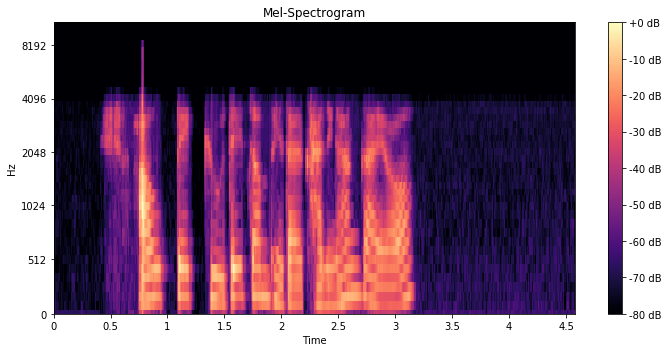

In [7]:
mel = Mel_S(data[0])

In [20]:
def Stft(wav):
    y, sr = librosa.load(wav)
    S, phase = librosa.magphase(librosa.stft(y,n_fft=512))
    plt.figure(figsize=(10, 5))
    librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                             y_axis='log', x_axis='time', sr=sr)
    plt.colorbar()
    plt.tight_layout()
    return librosa.amplitude_to_db(S, ref=np.max)

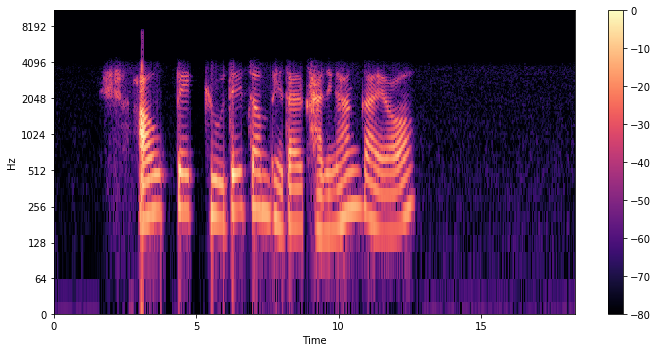

In [21]:
st = Stft(data[0])

In [18]:
st.shape

(257, 788)

In [19]:
np.max(st)

0.0

(array([1.3705e+05, 1.8020e+03, 1.9050e+03, 2.0780e+03, 2.0000e+03,
        2.0870e+03, 2.2100e+03, 2.2290e+03, 2.1870e+03, 2.1120e+03,
        2.0790e+03, 1.9340e+03, 1.7260e+03, 1.6300e+03, 1.5430e+03,
        1.4460e+03, 1.2300e+03, 1.2090e+03, 1.0200e+03, 1.0980e+03,
        1.0280e+03, 9.2900e+02, 9.3500e+02, 9.1600e+02, 8.7600e+02,
        8.7200e+02, 7.7700e+02, 8.3200e+02, 8.1300e+02, 7.6600e+02,
        7.7600e+02, 6.9200e+02, 6.8600e+02, 6.4900e+02, 6.5200e+02,
        7.0000e+02, 6.3400e+02, 6.1700e+02, 6.4200e+02, 6.4100e+02,
        6.3600e+02, 6.1400e+02, 5.9100e+02, 5.5600e+02, 6.3700e+02,
        6.1700e+02, 5.9200e+02, 5.5900e+02, 5.9500e+02, 5.4400e+02,
        5.2100e+02, 5.5500e+02, 5.1800e+02, 4.9000e+02, 4.9700e+02,
        4.6700e+02, 4.5600e+02, 4.1600e+02, 3.9000e+02, 4.2100e+02,
        3.7400e+02, 3.7300e+02, 3.8500e+02, 3.1800e+02, 2.8400e+02,
        2.6800e+02, 2.8500e+02, 2.9600e+02, 2.3200e+02, 2.7400e+02,
        2.5900e+02, 2.4800e+02, 2.2700e+02, 2.33

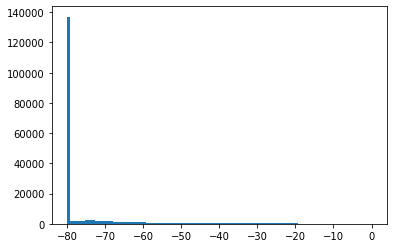

In [20]:
x = []
for i in st:
    for j in i:
        x.append(j)
plt.hist(x,bins=100)

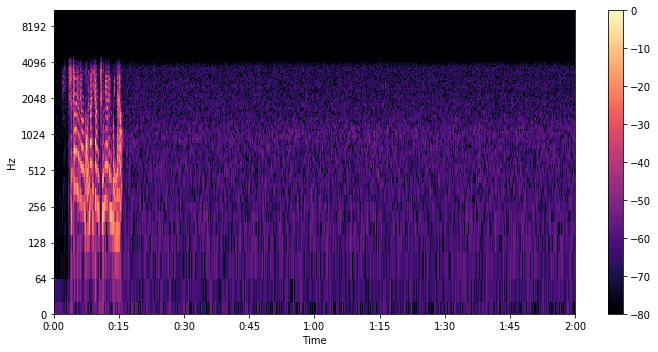

In [25]:
st = Stft(data[76])

In [30]:
st.shape

(257, 5168)

In [66]:
np.max(st)

34.108864

In [15]:
def cut_sig(sig):
    start = 0
    end = len(sig)-1
    for hz in sig:
        if hz < 0.01:
            start += 1
        else:
            break
    for hz in sig[::-1]:
        if hz < 0.01:
            end -= 1
        else:
            break
    return sig[start:end]

In [16]:
def Mfcc(wav):
    y, sr = librosa.load(wav)
    plt.plot(y)
    plt.show()
    mf = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    plt.figure(figsize=(10,5))
    librosa.display.specshow(mf, x_axis="time")
    plt.colorbar()
    plt.title("MFCC")
    plt.tight_layout()
    plt.show()
    
    y = cut_sig(y)
    plt.plot(y)
    plt.show()
    mf = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    plt.figure(figsize=(10,5))
    librosa.display.specshow(mf, x_axis="time")
    plt.colorbar()
    plt.title("MFCC")
    plt.tight_layout()
    plt.show()
    return mf

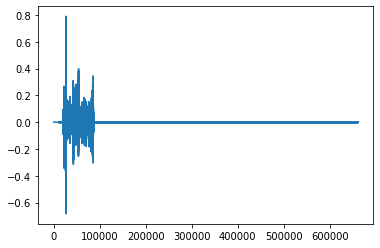

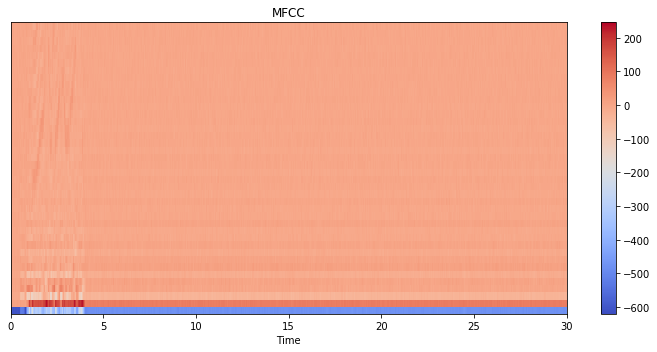

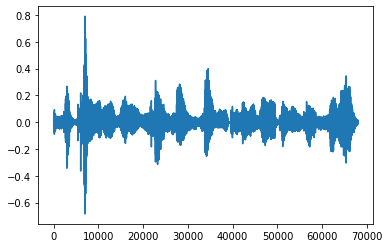

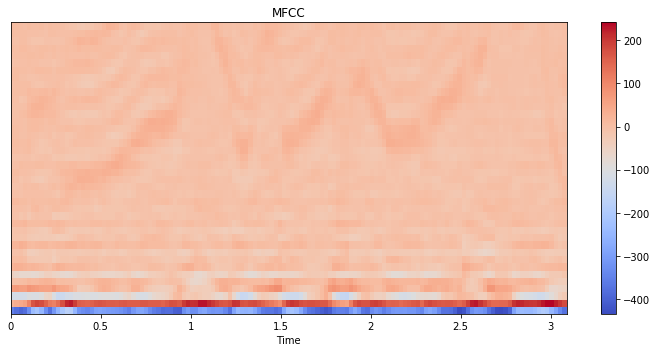

In [17]:
mfcc = Mfcc(data[76])

In [18]:
mfcc.shape

(40, 133)